In [2]:
import pandas as pd

df = pd.read_csv('accidents_2005_to_2007.csv', low_memory=False)
df.head()


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,NaN,NaN,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,NaN,NaN,1,Yes,E01002863,2005


In [4]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570011 entries, 0 to 570010
Data columns (total 33 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               570011 non-null  object 
 1   Location_Easting_OSGR                        569910 non-null  float64
 2   Location_Northing_OSGR                       569910 non-null  float64
 3   Longitude                                    569910 non-null  float64
 4   Latitude                                     569910 non-null  float64
 5   Police_Force                                 570011 non-null  int64  
 6   Accident_Severity                            570011 non-null  int64  
 7   Number_of_Vehicles                           570011 non-null  int64  
 8   Number_of_Casualties                         570011 non-null  int64  
 9   Date                                         570011 non-nul

<Axes: title={'center': 'Yıllara Göre Kaza Sayısı'}, xlabel='Year'>

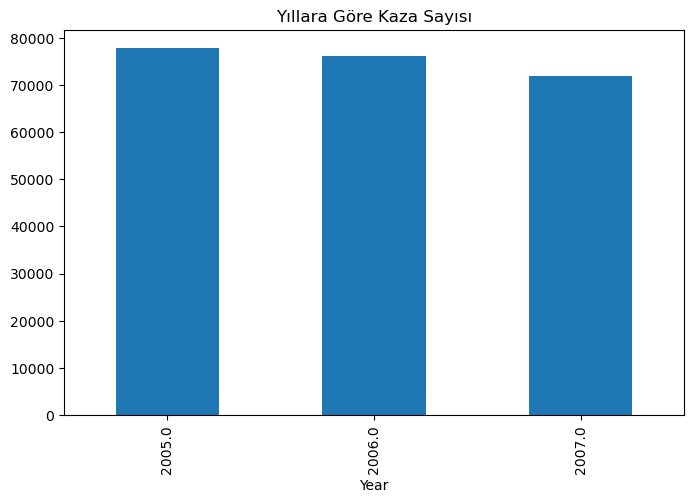

In [6]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year

df['Year'].value_counts().sort_index().plot(kind='bar', title='Yıllara Göre Kaza Sayısı', figsize=(8, 5))


/var/folders/1_/5j6c6k0946q4b0h49nnk1qth0000gn/T/ipykernel_17472/183795315.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'], errors='coerce').dt.hour


<Axes: title={'center': 'Saatlere Göre Kaza Dağılımı'}, xlabel='Time'>

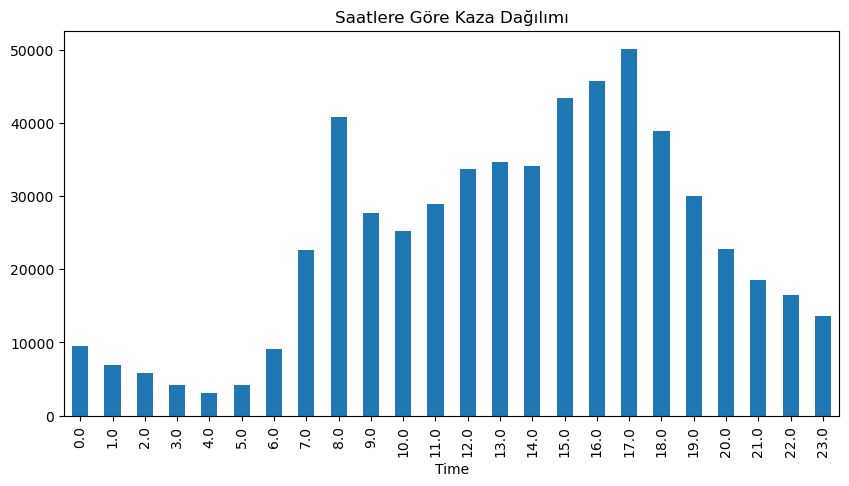

In [8]:
df['Time'] = pd.to_datetime(df['Time'], errors='coerce').dt.hour
df['Time'].value_counts().sort_index().plot(kind='bar', title='Saatlere Göre Kaza Dağılımı', figsize=(10,5))


<Axes: title={'center': 'Haftanın Günlerine Göre Kaza Dağılımı'}, xlabel='Weekday_Name'>

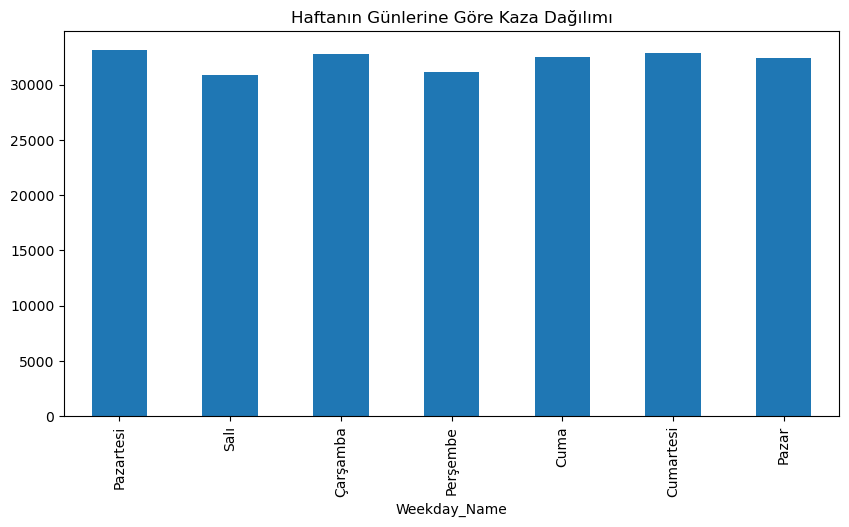

In [10]:

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

df['Weekday'] = df['Date'].dt.dayofweek

weekday_map = {
    0: 'Pazartesi', 1: 'Salı', 2: 'Çarşamba',
    3: 'Perşembe', 4: 'Cuma', 5: 'Cumartesi', 6: 'Pazar'
}
df['Weekday_Name'] = df['Weekday'].map(weekday_map)


df['Weekday_Name'].value_counts().loc[
    ['Pazartesi','Salı','Çarşamba','Perşembe','Cuma','Cumartesi','Pazar']
].plot(kind='bar', title='Haftanın Günlerine Göre Kaza Dağılımı', figsize=(10,5))


Text(0, 0.5, 'Kaza Sayısı')

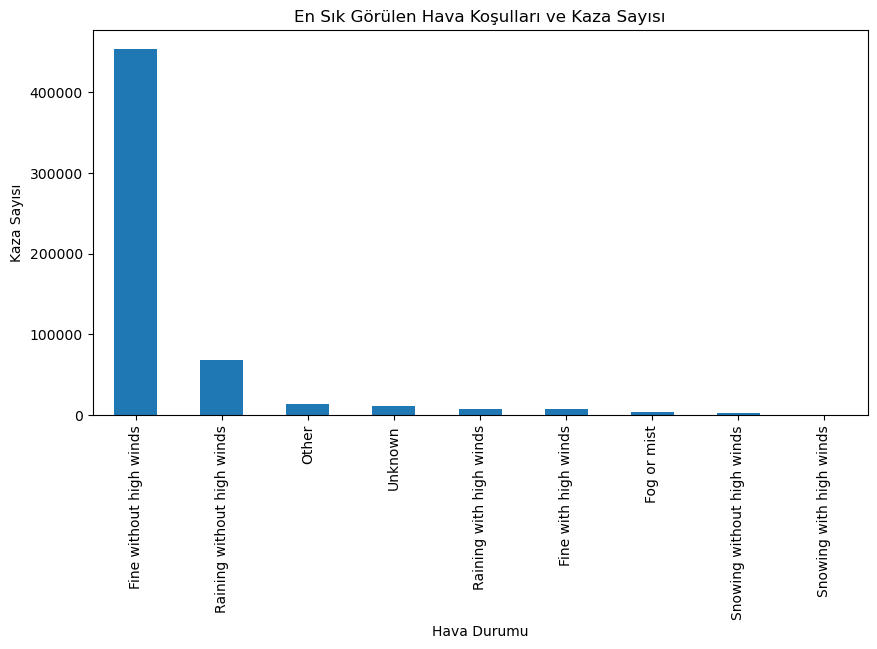

In [14]:
import matplotlib.pyplot as plt

df['Weather_Conditions'].value_counts().head(10).plot(
    kind='bar', title='En Sık Görülen Hava Koşulları ve Kaza Sayısı', figsize=(10,5))
plt.xlabel('Hava Durumu')
plt.ylabel('Kaza Sayısı')


Text(0, 0.5, '')

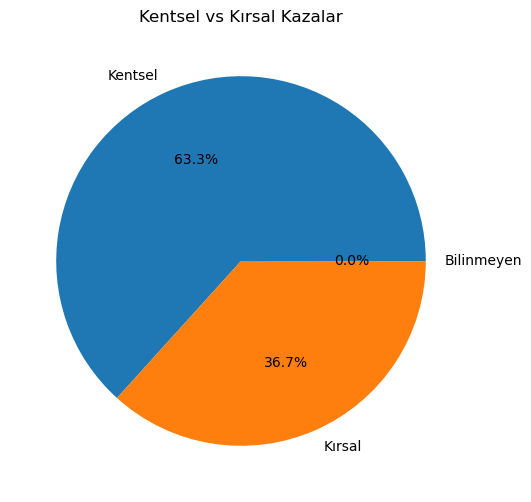

In [16]:
area_map = {
    1: 'Kentsel',
    2: 'Kırsal',
    3: 'Bilinmeyen'
}

df['Area_Type'] = df['Urban_or_Rural_Area'].map(area_map)

df['Area_Type'].value_counts().plot(
    kind='pie', autopct='%1.1f%%', title='Kentsel vs Kırsal Kazalar', figsize=(6, 6))
plt.ylabel("")


In [18]:
traffic_df = pd.read_csv('ukTrafficAADF.csv', low_memory=False)
traffic_df.head()



,AADFYear,CP,Estimation_method,Estimation_method_detailed,Region,LocalAuthority,Road,RoadCategory,Easting,Northing,...,V2AxleRigidHGV,V3AxleRigidHGV,V4or5AxleRigidHGV,V3or4AxleArticHGV,V5AxleArticHGV,V6orMoreAxleArticHGV,AllHGVs,AllMotorVehicles,Lat,Lon
0,2000,6007,Counted,Manual count,Yorkshire and the Humber,Rotherham,M1,TM,446000,389300,...,5351,656,711,1588,4715,2149,15170,111146,53.398531,-1.309655
1,2000,6009,Counted,Manual count,Yorkshire and the Humber,Leeds,M621,TM,432150,429500,...,1293,272,287,628,1494,921,4895,65939,53.760869,-1.513814
2,2000,6035,Counted,Manual count,Yorkshire and the Humber,Doncaster,M18,TM,466400,407900,...,1952,257,239,745,3695,2000,8888,40229,53.563523,-0.998970
3,2000,6054,Counted,Manual count,Yorkshire and the Humber,Calderdale,M62,TM,404000,416600,...,3121,508,354,1786,5902,3438,15109,85759,53.645893,-1.940967
4,2000,6055,Counted,Manual count,Yorkshire and the Humber,Leeds,M62,TM,426000,426200,...,4030,624,423,1947,6669,3743,17436,98487,53.731551,-1.607374


In [20]:
traffic_df.info()
traffic_df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275385 entries, 0 to 275384
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   AADFYear                    275385 non-null  int64  
 1   CP                          275385 non-null  int64  
 2   Estimation_method           237812 non-null  object 
 3   Estimation_method_detailed  237812 non-null  object 
 4   Region                      275385 non-null  object 
 5   LocalAuthority              275385 non-null  object 
 6   Road                        275385 non-null  object 
 7   RoadCategory                275385 non-null  object 
 8   Easting                     275385 non-null  int64  
 9   Northing                    275385 non-null  int64  
 10  StartJunction               275129 non-null  object 
 11  EndJunction                 275147 non-null  object 
 12  LinkLength_km               275385 non-null  float64
 13  LinkLength_mil

Index(['AADFYear', 'CP', 'Estimation_method', 'Estimation_method_detailed',
       'Region', 'LocalAuthority', 'Road', 'RoadCategory', 'Easting',
       'Northing', 'StartJunction', 'EndJunction', 'LinkLength_km',
       'LinkLength_miles', 'PedalCycles', 'Motorcycles', 'CarsTaxis',
       'BusesCoaches', 'LightGoodsVehicles', 'V2AxleRigidHGV',
       'V3AxleRigidHGV', 'V4or5AxleRigidHGV', 'V3or4AxleArticHGV',
       'V5AxleArticHGV', 'V6orMoreAxleArticHGV', 'AllHGVs', 'AllMotorVehicles',
       'Lat', 'Lon'],
      dtype='object')

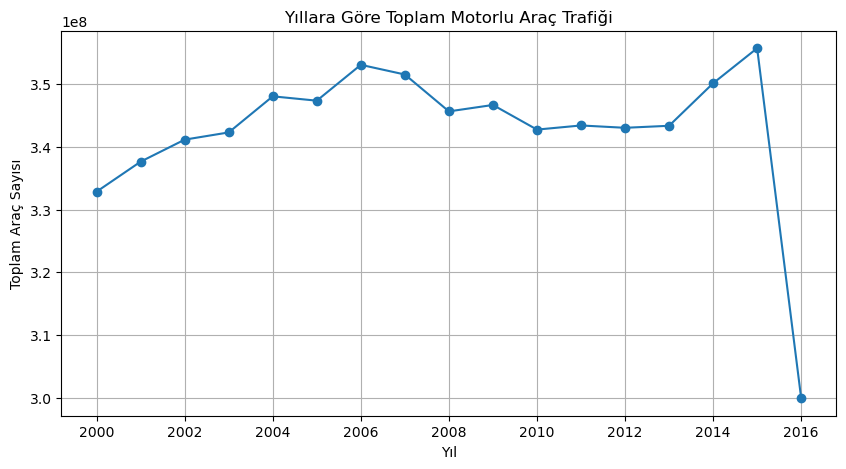

In [26]:
traffic_df.groupby('AADFYear')['AllMotorVehicles'].sum().plot(
    kind='line', marker='o', figsize=(10, 5), title='Yıllara Göre Toplam Motorlu Araç Trafiği')

plt.xlabel('Yıl')
plt.ylabel('Toplam Araç Sayısı')
plt.grid(True)
plt.show()




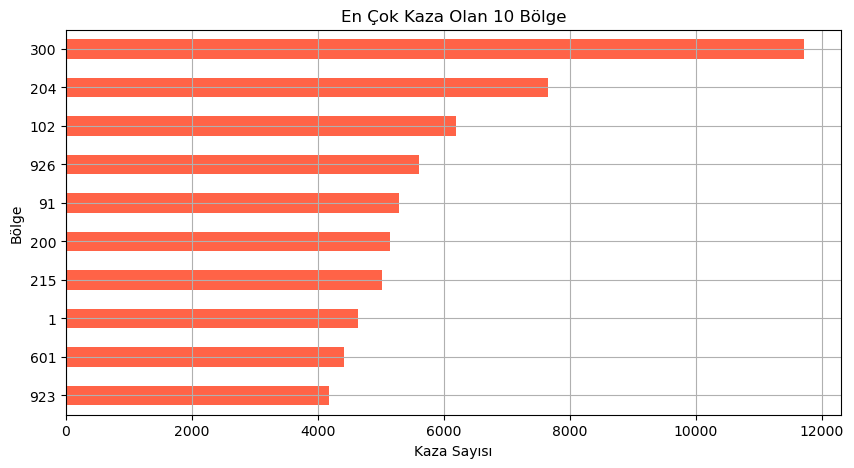

In [45]:
# En çok kazaya sahip 10 yerel bölge
top_10_areas = accidents_df['Local_Authority_(District)'].value_counts().head(10)

top_10_areas.plot(kind='barh', figsize=(10, 5), color='tomato', title='En Çok Kaza Olan 10 Bölge')
plt.xlabel('Kaza Sayısı')
plt.ylabel('Bölge')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()


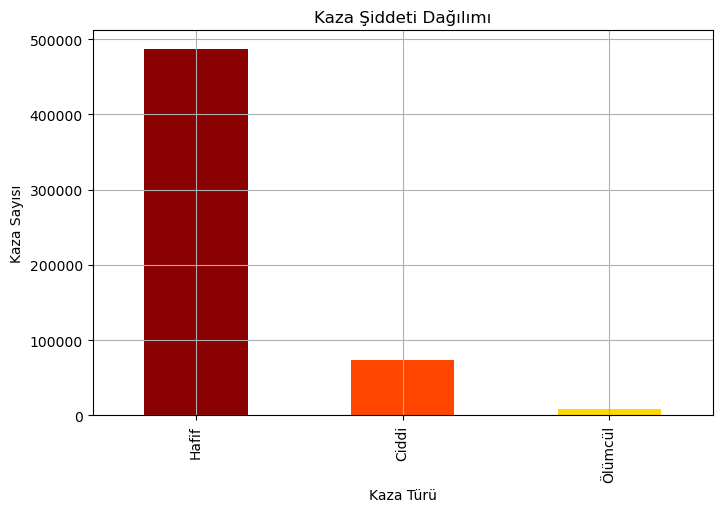

In [47]:

severity_map = {
    1: 'Ölümcül',
    2: 'Ciddi',
    3: 'Hafif'
}
accidents_df['Severity_Label'] = accidents_df['Accident_Severity'].map(severity_map)

accidents_df['Severity_Label'].value_counts().plot(
    kind='bar', color=['darkred', 'orangered', 'gold'],
    title='Kaza Şiddeti Dağılımı', figsize=(8, 5))

plt.xlabel("Kaza Türü")
plt.ylabel("Kaza Sayısı")
plt.grid(True)
plt.show()


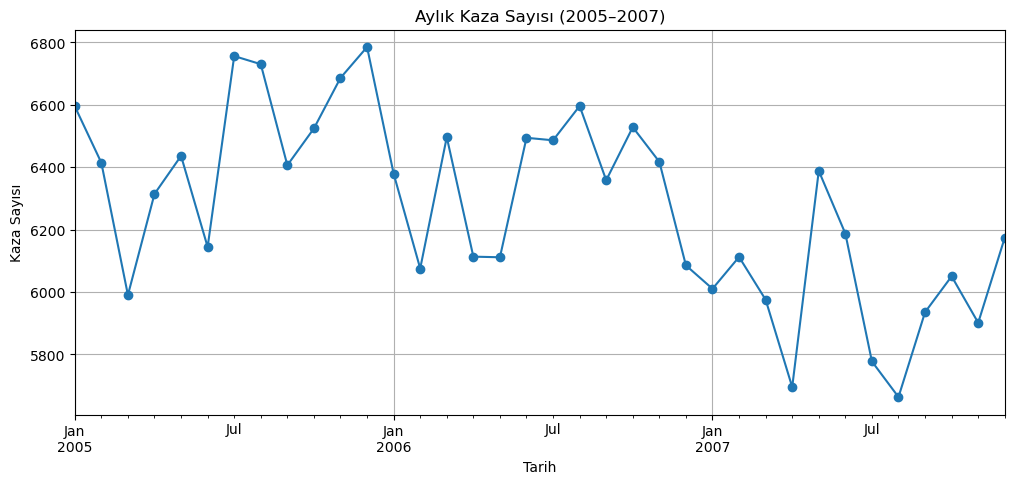

In [49]:

accidents_df['Date'] = pd.to_datetime(accidents_df['Date'], errors='coerce')

monthly_accidents = accidents_df.groupby(accidents_df['Date'].dt.to_period('M')).size()
monthly_accidents = monthly_accidents.to_timestamp()  # Dönüşüm: Period -> Timestamp

# Grafikle göster
monthly_accidents.plot(figsize=(12,5), title='Aylık Kaza Sayısı (2005–2007)', marker='o')
plt.xlabel('Tarih')
plt.ylabel('Kaza Sayısı')
plt.grid(True)
plt.show()


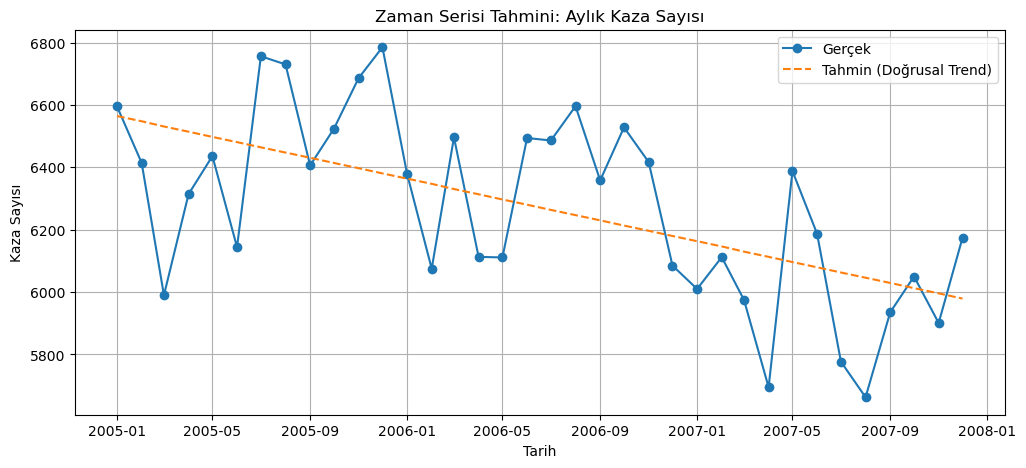

In [51]:
import numpy as np
from sklearn.linear_model import LinearRegression


monthly_accidents = monthly_accidents.dropna()
X = np.arange(len(monthly_accidents)).reshape(-1, 1)  # 0, 1, 2, ...
y = monthly_accidents.values


model = LinearRegression()
model.fit(X, y)


y_pred = model.predict(X)


plt.figure(figsize=(12,5))
plt.plot(monthly_accidents.index, y, label='Gerçek', marker='o')
plt.plot(monthly_accidents.index, y_pred, label='Tahmin (Doğrusal Trend)', linestyle='--')
plt.title("Zaman Serisi Tahmini: Aylık Kaza Sayısı")
plt.xlabel("Tarih")
plt.ylabel("Kaza Sayısı")
plt.legend()
plt.grid(True)
plt.show()
